<a href="https://colab.research.google.com/github/felipemartinsn/metricas-de-desempenho/blob/main/avaliacao_de_aprendizado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

### *Dataset encontrado no kaggle

In [19]:
df = pd.read_csv('Dry_Bean_Dataset.csv')
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [20]:
#Escolhendo parametros manualmente para testar a robustez do modelo
X = df[['Area', 'Perimeter', 'Eccentricity']]
y = df['Class']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [22]:
clf = svm.SVC()
clf.fit(X, y)
pred_clf = clf.predict(X_test)

In [23]:
cf_matrix = confusion_matrix(y_test, pred_clf)
cf_matrix

array([[ 18,   0, 267,   0,  97,   0,  13],
       [  0, 161,   0,   0,   0,   0,   0],
       [ 13,   0, 421,   0,  43,   0,   2],
       [  0,   0,   0, 869,   0, 123,  51],
       [ 16,   0,  31,  13, 325,  12, 191],
       [  0,   0,   0, 210,  12, 154, 243],
       [  0,   0,   0,  39,  63,  84, 613]])

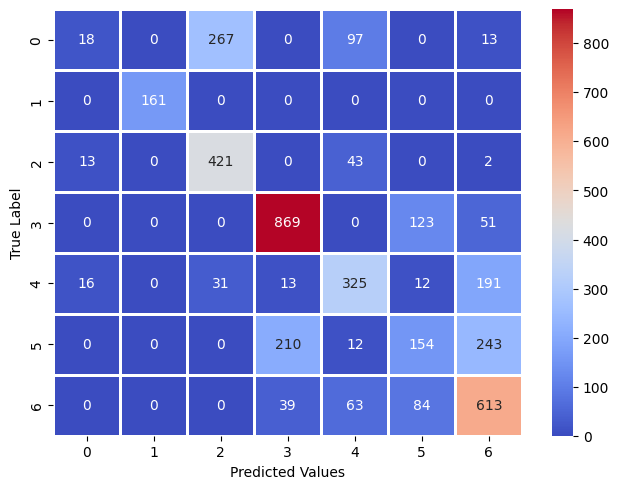

In [26]:
# Criando o heatmap
sns.heatmap(cf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Values')
plt.show()

In [25]:
# Printando as métricas de precision, recall e f1-score
print(classification_report(y_test, pred_clf))

              precision    recall  f1-score   support

    BARBUNYA       0.38      0.05      0.08       395
      BOMBAY       1.00      1.00      1.00       161
        CALI       0.59      0.88      0.70       479
    DERMASON       0.77      0.83      0.80      1043
       HOROZ       0.60      0.55      0.58       588
       SEKER       0.41      0.25      0.31       619
        SIRA       0.55      0.77      0.64       799

    accuracy                           0.63      4084
   macro avg       0.61      0.62      0.59      4084
weighted avg       0.60      0.63      0.59      4084

